This notebook is useful to explore the clinical annotation data considering only the patients with the highest quality of RNA-samples (n = 152).

**Goal**: exploratory data analysis regarding to the high quality samples and make a comparison between the complete group of patients.

### Import Utils and Setup

In [ ]:
## Communication drive-colab
from google.colab import drive
import warnings
import os

## Data Structure and Data Analysis
import pandas as pd
import numpy as np
import statistics

## Visualization
import matplotlib.pyplot as plt

In [ ]:
## Mount drive
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [ ]:
## Toggle as needed
warnings.filterwarnings("ignore")

## To see the maximum number of columns
pd.set_option("display.max_columns", None)

## GGplot as default style
plt.style.use("ggplot")

## Source path
source_path_data     = "/content/drive/MyDrive/Tesi/Code/Personal_Code/Saved/Data/"
source_path_features = "/content/drive/MyDrive/Tesi/Code/Personal_Code/Saved/Features/"

### Read Clinical Data (Highest quality: n = 152, p = 353)

In [ ]:
## Load Data
master_annotations_df = pd.read_csv(source_path_data + "su2c_merge_master.csv", sep = ",", usecols = lambda x: x != "Unnamed: 0")

In [ ]:
## Check
print("Shape is: ", master_annotations_df.shape)
display(master_annotations_df.head())

Shape is:  (393, 353)


,WES_Cohort_1,WES_Cohort_2,WES_All,RNA_Cohort_1,RNA_Cohort_2,RNA_All,Institution,Harmonized_SU2C_Participant_ID_v2,Harmonized_SU2C_WES_Tumor_Sample_ID_v2,Harmonized_SU2C_WES_Normal_Sample_ID_v2,Harmonized_SU2C_RNA_Tumor_Sample_ID_v2,Pre-treatment_RNA_Sample_QC,Patient_Age_at_Diagnosis,Patient_Sex,Patient_Race,Patient_Smoking_Status,Patient_Smoking_Pack_Years_Harmonized,Histology_Harmonized,Histology_Detail,Initial_Stage,Initial_Stage_Substage,PDL1_TPS,PDL1_TPS_Description,Local_Antibody_Clone,Clinical_Driver,Sequencing_Platform,Advanced_Diagnosis_Date,Line_of_Therapy,Agent_PD1,Agent_PD1_Category,Prior_Platinum,Prior_TKI,Harmonized_PFS_Event,Harmonized_PFS_Days,Harmonized_Confirmed_BOR,Harmonized_BOR_RECIST,Harmonized_OS_Event,Harmonized_OS_Days,Harmonized_Confirmed_BOR_Bin,Harmonized_Confirmed_BOR_3_Cat,Harmonized_PFS_Months,Harmonized_OS_Months,Advanced_Diagnosis_Date_Positive,Patient_Smoking_Pack_Years_Harmonized_Log,APC_MUT,ARHGAP35_MUT,ARID1A_MUT,ATF7IP_MUT,ATM_MUT,B2M_MUT,BRAF_MUT,CDKN2A_MUT,CMTR2_MUT,COL5A2_MUT,CREBBP_MUT,CTNNB1_MUT,CUL3_MUT,DSN1_MUT,EGFR_MUT,ELL2_MUT,EP300_MUT,ERBB2_MUT,FANCM_MUT,FAT1_MUT,FBXW7_MUT,HLA-A_MUT,HRAS_MUT,ITGBL1_MUT,KEAP1_MUT,KLF5_MUT,KLHL5_MUT,KMT2C_MUT,KMT2D_MUT,KRAS_MUT,LATS1_MUT,MET_MUT,MGA_MUT,NCOA6_MUT,NF1_MUT,NFE2L2_MUT,NOTCH1_MUT,NRAS_MUT,PIK3CA_MUT,PLXNB2_MUT,PTEN_MUT,RASA1_MUT,RB1_MUT,RBM10_MUT,RIT1_MUT,SETD2_MUT,SMAD4_MUT,SMARCA4_MUT,STK11_MUT,TP53_MUT,U2AF1_MUT,ZFP36L1_MUT,MYCL_CNV,MCL1_CNV,BCL11A_CNV,REL_CNV,NFE2L2_CNV,FOXP1_CNV,ROBO1_CNV,MECOM_CNV,TERC_CNV,SOX2_CNV,PDGFRA_CNV,KIT_CNV,KDR_CNV,FAT1_CNV,TERT_CNV,CCND3_CNV,PTP4A1_CNV,PHF3_CNV,EGFR_CNV,CDK6_CNV,MET_CNV,KMT2C_CNV,FGFR1_CNV,KAT6A_CNV,MYC_CNV,CDKN2A_CNV,ZMYND11_CNV,PTEN_CNV,CCND1_CNV,KDM5A_CNV,KRAS_CNV,CDK4_CNV,MDM2_CNV,RB1_CNV,TRAF3_CNV,B2M_CNV,IGF1R_CNV,CREBBP_CNV,USP22_CNV,NF1_CNV,ERBB2_CNV,TUBD1_CNV,SMAD4_CNV,CCNE1_CNV,BCL2L1_CNV,ZNF217_CNV,MAPK1_CNV,Amp_1q21.3,Amp_2p16.1,Amp_3q26.2,Amp_3q27.1,Amp_4q12,Amp_5p15.33,Amp_6p21.1,Amp_7p15.3,Amp_7p11.2,Amp_7q21.12,Amp_8p11.23,Amp_8q24.21,Amp_9p13.3,Amp_11p13,Amp_11q13.3,Amp_12p12.1,Amp_12q14.1,Amp_12q15,Amp_13q34,Amp_14q13.3,Amp_17q24.2,Amp_19q12,Amp_20q11.21,Amp_20q13.33,Del_1p36.12,Del_1p13.2,Del_2p24.2,Del_2q37.3,Del_3p12.3,Del_4p16.3,Del_4q13.2,Del_4q35.1,Del_5q13.3,Del_5q23.1,Del_6p22.1,Del_6q22.31,Del_7p14.3,Del_8p23.3,Del_8p21.3,Del_9p21.3,Del_9q21.13,Del_9q22.1,Del_9q34.3,Del_10p15.3,Del_10q23.31,Del_10q26.3,Del_11p15.5,Del_11q25,Del_12p13.2,Del_12p11.21,Del_12q21.31,Del_13q14.2,Del_14q23.1,Del_14q24.3,Del_15q11.2,Del_16p13.3,Del_16q24.3,Del_17p13.3,Del_17p12,Del_18q22.1,Del_19p13.3,Del_19p12,Del_19q13.33,Del_20p13,Del_20q11.23,Del_21q11.2,Del_22q11.23,Del_22q13.1,1p,1q,2p,2q,3p,3q,4p,4q,5p,5q,6p,6q,7p,7q,8p,8q,9p,9q,10p,10q,11p,11q,12p,12q,13q,14q,15q,16p,16q,17p,17q,18p,18q,19p,19q,20p,20q,21q,22q,Total_amps,Total_dels,TMB,TMB_clonal,TMB_subclonal,TMB_indel,Neoantigens,Neoantigens_clonal,Neoantigens_subclonal,Subclone_count,Aging_Signature,Smoking_Signature,APOBEC_Signature,log_TMB,log_TMB_clonal,log_TMB_subclonal,log_TMB_indel,log_Neoantigens,log_Neoantigens_clonal,log_Neoantigens_subclonal,log_Subclone_count,log_Aging_Signature,log_Smoking_Signature,log_APOBEC_Signature,HLA_LOH_present,HLA_hom_present,B2M_altered,log_DNA_BCR_burden,log_DNA_TCR_burden,DNA_BCR_entropy,DNA_TCR_entropy,Ploidy,Purity,Tumor_cluster,T1_strength,T2_strength,T3_strength,T4_strength,T1_norm,T2_norm,T3_norm,T4_norm,Integrative_cluster,I1_strength,I2_strength,I3_strength,I1_norm,I2_norm,I3_norm,Adenosine (Corvus)_HM,Antigen processing machinery (PMID: 27855702)_HM,EMT2 (PMID: 27321955)_HM,IFNG_HM,Merck/Nanostring 18 gene T cell–inflamed GEP score_HM,NFAT/NR4A1 family T cell dysfunction_HM,TGF-B (Mariathasan Nature 2018)_HM,B-cells_DH,CD45_DH,CD8 T cells_DH,Cytotoxic cells_DH,DC_DH,Exhausted CD8_DH,Macrophages_DH,Mast cells_DH,Neutrophils_DH,NK CD56dim cells_DH,NK cells_DH,T-cells_DH,Th1 cells_DH,Treg_DH,B-cells_SF,Cytotoxic cells_SF,DC_SF,Exhausted CD8_SF,Exhausted/HS CD8_SF,Lymphocytes_

In [ ]:
## Load Data
with open(source_path_features + "common_patients.txt", "r") as file:
    common_patients = [line.strip() for line in file.readlines()]

In [ ]:
## Check
print("Number of common patients: ", len(common_patients))

Number of common patients:  152


Filter the dataframe only considering the patients with the highest quality sample (n = 152). The result must be a dataframe with shape (152, 353)


In [ ]:
## Extract the subset
master_annotations_df_hq = master_annotations_df[master_annotations_df["Harmonized_SU2C_RNA_Tumor_Sample_ID_v2"].isin(common_patients)]
## Check
print("Shape is: ", master_annotations_df_hq.shape)
display(master_annotations_df_hq.head())

Shape is:  (152, 353)


,WES_Cohort_1,WES_Cohort_2,WES_All,RNA_Cohort_1,RNA_Cohort_2,RNA_All,Institution,Harmonized_SU2C_Participant_ID_v2,Harmonized_SU2C_WES_Tumor_Sample_ID_v2,Harmonized_SU2C_WES_Normal_Sample_ID_v2,Harmonized_SU2C_RNA_Tumor_Sample_ID_v2,Pre-treatment_RNA_Sample_QC,Patient_Age_at_Diagnosis,Patient_Sex,Patient_Race,Patient_Smoking_Status,Patient_Smoking_Pack_Years_Harmonized,Histology_Harmonized,Histology_Detail,Initial_Stage,Initial_Stage_Substage,PDL1_TPS,PDL1_TPS_Description,Local_Antibody_Clone,Clinical_Driver,Sequencing_Platform,Advanced_Diagnosis_Date,Line_of_Therapy,Agent_PD1,Agent_PD1_Category,Prior_Platinum,Prior_TKI,Harmonized_PFS_Event,Harmonized_PFS_Days,Harmonized_Confirmed_BOR,Harmonized_BOR_RECIST,Harmonized_OS_Event,Harmonized_OS_Days,Harmonized_Confirmed_BOR_Bin,Harmonized_Confirmed_BOR_3_Cat,Harmonized_PFS_Months,Harmonized_OS_Months,Advanced_Diagnosis_Date_Positive,Patient_Smoking_Pack_Years_Harmonized_Log,APC_MUT,ARHGAP35_MUT,ARID1A_MUT,ATF7IP_MUT,ATM_MUT,B2M_MUT,BRAF_MUT,CDKN2A_MUT,CMTR2_MUT,COL5A2_MUT,CREBBP_MUT,CTNNB1_MUT,CUL3_MUT,DSN1_MUT,EGFR_MUT,ELL2_MUT,EP300_MUT,ERBB2_MUT,FANCM_MUT,FAT1_MUT,FBXW7_MUT,HLA-A_MUT,HRAS_MUT,ITGBL1_MUT,KEAP1_MUT,KLF5_MUT,KLHL5_MUT,KMT2C_MUT,KMT2D_MUT,KRAS_MUT,LATS1_MUT,MET_MUT,MGA_MUT,NCOA6_MUT,NF1_MUT,NFE2L2_MUT,NOTCH1_MUT,NRAS_MUT,PIK3CA_MUT,PLXNB2_MUT,PTEN_MUT,RASA1_MUT,RB1_MUT,RBM10_MUT,RIT1_MUT,SETD2_MUT,SMAD4_MUT,SMARCA4_MUT,STK11_MUT,TP53_MUT,U2AF1_MUT,ZFP36L1_MUT,MYCL_CNV,MCL1_CNV,BCL11A_CNV,REL_CNV,NFE2L2_CNV,FOXP1_CNV,ROBO1_CNV,MECOM_CNV,TERC_CNV,SOX2_CNV,PDGFRA_CNV,KIT_CNV,KDR_CNV,FAT1_CNV,TERT_CNV,CCND3_CNV,PTP4A1_CNV,PHF3_CNV,EGFR_CNV,CDK6_CNV,MET_CNV,KMT2C_CNV,FGFR1_CNV,KAT6A_CNV,MYC_CNV,CDKN2A_CNV,ZMYND11_CNV,PTEN_CNV,CCND1_CNV,KDM5A_CNV,KRAS_CNV,CDK4_CNV,MDM2_CNV,RB1_CNV,TRAF3_CNV,B2M_CNV,IGF1R_CNV,CREBBP_CNV,USP22_CNV,NF1_CNV,ERBB2_CNV,TUBD1_CNV,SMAD4_CNV,CCNE1_CNV,BCL2L1_CNV,ZNF217_CNV,MAPK1_CNV,Amp_1q21.3,Amp_2p16.1,Amp_3q26.2,Amp_3q27.1,Amp_4q12,Amp_5p15.33,Amp_6p21.1,Amp_7p15.3,Amp_7p11.2,Amp_7q21.12,Amp_8p11.23,Amp_8q24.21,Amp_9p13.3,Amp_11p13,Amp_11q13.3,Amp_12p12.1,Amp_12q14.1,Amp_12q15,Amp_13q34,Amp_14q13.3,Amp_17q24.2,Amp_19q12,Amp_20q11.21,Amp_20q13.33,Del_1p36.12,Del_1p13.2,Del_2p24.2,Del_2q37.3,Del_3p12.3,Del_4p16.3,Del_4q13.2,Del_4q35.1,Del_5q13.3,Del_5q23.1,Del_6p22.1,Del_6q22.31,Del_7p14.3,Del_8p23.3,Del_8p21.3,Del_9p21.3,Del_9q21.13,Del_9q22.1,Del_9q34.3,Del_10p15.3,Del_10q23.31,Del_10q26.3,Del_11p15.5,Del_11q25,Del_12p13.2,Del_12p11.21,Del_12q21.31,Del_13q14.2,Del_14q23.1,Del_14q24.3,Del_15q11.2,Del_16p13.3,Del_16q24.3,Del_17p13.3,Del_17p12,Del_18q22.1,Del_19p13.3,Del_19p12,Del_19q13.33,Del_20p13,Del_20q11.23,Del_21q11.2,Del_22q11.23,Del_22q13.1,1p,1q,2p,2q,3p,3q,4p,4q,5p,5q,6p,6q,7p,7q,8p,8q,9p,9q,10p,10q,11p,11q,12p,12q,13q,14q,15q,16p,16q,17p,17q,18p,18q,19p,19q,20p,20q,21q,22q,Total_amps,Total_dels,TMB,TMB_clonal,TMB_subclonal,TMB_indel,Neoantigens,Neoantigens_clonal,Neoantigens_subclonal,Subclone_count,Aging_Signature,Smoking_Signature,APOBEC_Signature,log_TMB,log_TMB_clonal,log_TMB_subclonal,log_TMB_indel,log_Neoantigens,log_Neoantigens_clonal,log_Neoantigens_subclonal,log_Subclone_count,log_Aging_Signature,log_Smoking_Signature,log_APOBEC_Signature,HLA_LOH_present,HLA_hom_present,B2M_altered,log_DNA_BCR_burden,log_DNA_TCR_burden,DNA_BCR_entropy,DNA_TCR_entropy,Ploidy,Purity,Tumor_cluster,T1_strength,T2_strength,T3_strength,T4_strength,T1_norm,T2_norm,T3_norm,T4_norm,Integrative_cluster,I1_strength,I2_strength,I3_strength,I1_norm,I2_norm,I3_norm,Adenosine (Corvus)_HM,Antigen processing machinery (PMID: 27855702)_HM,EMT2 (PMID: 27321955)_HM,IFNG_HM,Merck/Nanostring 18 gene T cell–inflamed GEP score_HM,NFAT/NR4A1 family T cell dysfunction_HM,TGF-B (Mariathasan Nature 2018)_HM,B-cells_DH,CD45_DH,CD8 T cells_DH,Cytotoxic cells_DH,DC_DH,Exhausted CD8_DH,Macrophages_DH,Mast cells_DH,Neutrophils_DH,NK CD56dim cells_DH,NK cells_DH,T-cells_DH,Th1 cells_DH,Treg_DH,B-cells_SF,Cytotoxic cells_SF,DC_SF,Exhausted CD8_SF,Exhausted/HS CD8_SF,Lymphocytes_

In [ ]:
## Save Clinical Table for HQ samples
master_annotations_df_hq.to_csv(source_path_data + "clinical_table_hq.csv", index = False)

### EDA

At this point, we make some useful analysis considering only the clinical data for patients with the highest quality samples of RNA-seq.

The plots are shown for the subset that we consider and also for the whole dataset.

In [ ]:
## Create a function that is used to make different plots
def plot_for_class(data, data_hq, feature, subtitle, col):
    """Input: data    ---> complete dataset (n = 393)
              data_hq ---> subset RNA sample (n = 152)
              feature ---> variable that is analyzed
              subtitle, col ---> parameters for plot"""
    """Output: Conditioned Barplot with percentage for each class"""

    ## For generale features
    ## Compute summary
    summary_hq = data_hq.groupby([feature]).size().sort_values(ascending = True)\
                                                                                .reset_index(name = "Count").set_index(feature).sort_values(by = "Count")
    summary    = data.groupby([feature]).size().sort_values(ascending = True).\
                                                                                reset_index(name = "Count").set_index(feature).sort_values(by = "Count")
    ## Percentage
    summary_hq["%"] = round(summary_hq["Count"] / sum(summary_hq["Count"]) * 100, 3)
    display(summary_hq)
    print("\n")
    summary["%"] = round(summary["Count"] / sum(summary["Count"]) * 100, 3)
    display(summary)
    print("\n")
    ## Compute labels
    labels_hq = [f"{value}%" for value in summary_hq["%"]]
    labels    = [f"{value}%" for value in summary["%"]]

    ## Institution Feature Case
    if feature in ["Institution"]:
        ## Plot
        plt.figure(figsize = (34, 8))
        plt.subplot(121)
        plt.bar_label(plt.barh(summary_hq.index.astype(str), summary_hq["Count"], color = col), labels = labels_hq)
        plt.title("HQ, n = 152")

        plt.subplot(122)
        plt.bar_label(plt.barh(summary.index.astype(str), summary["Count"], color = col), labels = labels)
        plt.title("ALL, n = 393")
        plt.suptitle(subtitle)

        plt.show()
        pass

    ## PD1 Agent Case
    if feature in ["Agent_PD1"]:
        ## Plot
        plt.figure(figsize = (34, 8))
        plt.subplot(121)
        plt.bar_label(plt.barh(summary_hq.index.astype(str), summary_hq["Count"], color = col), labels = labels_hq)
        plt.title("HQ, n = 152")

        plt.subplot(122)
        plt.bar_label(plt.barh(summary.index.astype(str), summary["Count"], color = col), labels = labels)
        plt.title("ALL, n = 393")
        plt.suptitle(subtitle)

        plt.show()
        pass

    ## Age Feature Case
    if feature in ["Patient_Age_at_Diagnosis"]:
        ## Divide the age in different range
        patient_age_filtered_hq = data_hq["Patient_Age_at_Diagnosis"].dropna()
        patient_age_filtered_hq = patient_age_filtered_hq.values.tolist()
        patient_age_filtered_hq.remove(">89")
        patient_age_filtered = data["Patient_Age_at_Diagnosis"].dropna()
        patient_age_filtered = patient_age_filtered.values.tolist()
        patient_age_filtered.remove(">89")
        ## Convert each element of the list into a int
        patient_age_filtered_hq = list(map(int, patient_age_filtered_hq))
        patient_age_filtered = list(map(int, patient_age_filtered))

        ## Init the dictonary to storage the counts for each set
        counts_hq = {}
        counts    = {}

        ## Divide the sequence of intervals into 10 and sum the counts for each set
        for num in patient_age_filtered_hq:
            interval = num // 10  ## Compute the interval
            counts_hq[interval] = counts_hq.get(interval, 0) + 1  ## Update the interval
        for num in patient_age_filtered:
            interval = num // 10  ## Compute the interval
            counts[interval] = counts.get(interval, 0) + 1  ## Update the interval

        ## Print the counts for each set
        interval_list_hq = []
        count_list_hq    = []
        interval_list    = []
        count_list       = []
        for interval, count in counts_hq.items():
            interval_list_hq.append(f"{interval*10}-{(interval*10)+9}")
            count_list_hq.append(count)
        for interval, count in counts.items():
            interval_list.append(f"{interval*10}-{(interval*10)+9}")
            count_list.append(count)
        ## Save dataframe
        summary_age_hq = pd.DataFrame({"Interval": interval_list_hq, "Count": count_list_hq}).set_index("Interval").sort_values(by = "Interval", ascending = True)
        display(summary_age_hq)
        print("\n")
        summary_age = pd.DataFrame({"Interval": interval_list, "Count": count_list}).set_index("Interval").sort_values(by = "Interval", ascending = True)
        display(summary_age)
        print("\n")
        ## Percentage
        summary_age_hq["%"] = round(summary_age_hq["Count"] / sum(summary_age_hq["Count"]) * 100, 3)
        summary_age["%"] = round(summary_age["Count"] / sum(summary_age["Count"]) * 100, 3)
        ## Compute labels
        labels_hq = [f"{value}%" for value in summary_age_hq["%"]]
        labels    = [f"{value}%" for value in summary_age["%"]]

        ## Distribution of Age
        plt.figure(figsize = (16, 5))
        plt.subplot(121)
        plt.bar_label(plt.bar(summary_age_hq.index.astype(str), summary_age_hq["Count"], color = "steelblue"), labels = labels_hq)
        plt.title("HQ, n = 152")

        plt.subplot(122)
        plt.bar_label(plt.bar(summary_age.index.astype(str), summary_age["Count"], color = "steelblue"), labels = labels)
        plt.title("ALL, n = 393")
        plt.suptitle(subtitle)

        plt.show()
        pass

    if feature not in ["Institution", "Patient_Age_at_Diagnosis", "Agent_PD1"]:
        ## Plot
        plt.figure(figsize = (16, 5))
        plt.subplot(121)
        plt.bar_label(plt.bar(summary_hq.index.astype(str), summary_hq["Count"], color = col), labels = labels_hq)
        plt.title("HQ, n = 152")

        plt.subplot(122)
        plt.bar_label(plt.bar(summary.index.astype(str), summary["Count"], color = col), labels = labels)
        plt.title("ALL, n = 393")
        plt.suptitle(subtitle)

        plt.show()

,Count,%
Line_of_Therapy,,
6.0,1,0.676
8.0,1,0.676
5.0,2,1.351
4.0,9,6.081
3.0,23,15.541
1.0,48,32.432
2.0,64,43.243


,Count,%
Line_of_Therapy,,
7.0,1,0.257
8.0,1,0.257
6.0,8,2.057
5.0,12,3.085
4.0,22,5.656
3.0,52,13.368
1.0,143,36.761
2.0,150,38.560


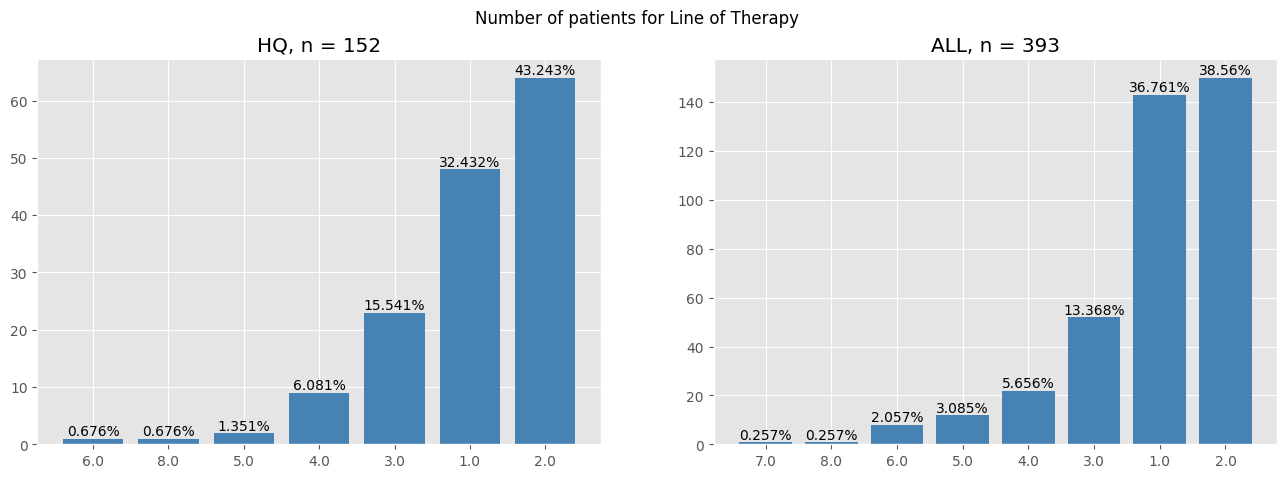

In [ ]:
## How many patients for line of therapy
plot_for_class(master_annotations_df, master_annotations_df_hq, "Line_of_Therapy", "Number of patients for Line of Therapy", "steelblue")

,Count,%
Initial_Stage,,
2.0,10,7.143
1.0,14,10.000
3.0,34,24.286
4.0,82,58.571


,Count,%
Initial_Stage,,
2.0,31,8.516
1.0,33,9.066
3.0,92,25.275
4.0,208,57.143


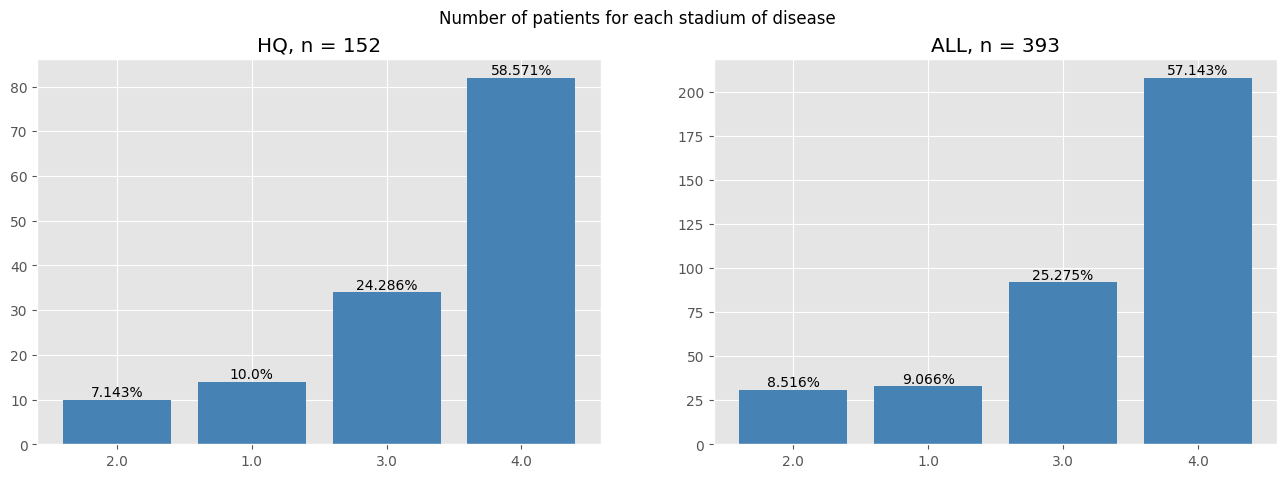

In [ ]:
## How many patients for different status
plot_for_class(master_annotations_df, master_annotations_df_hq, "Initial_Stage", "Number of patients for each stadium of disease", "steelblue")

,Count,%
Patient_Sex,,
M,65,43.919
F,83,56.081


,Count,%
Patient_Sex,,
M,182,46.787
F,207,53.213


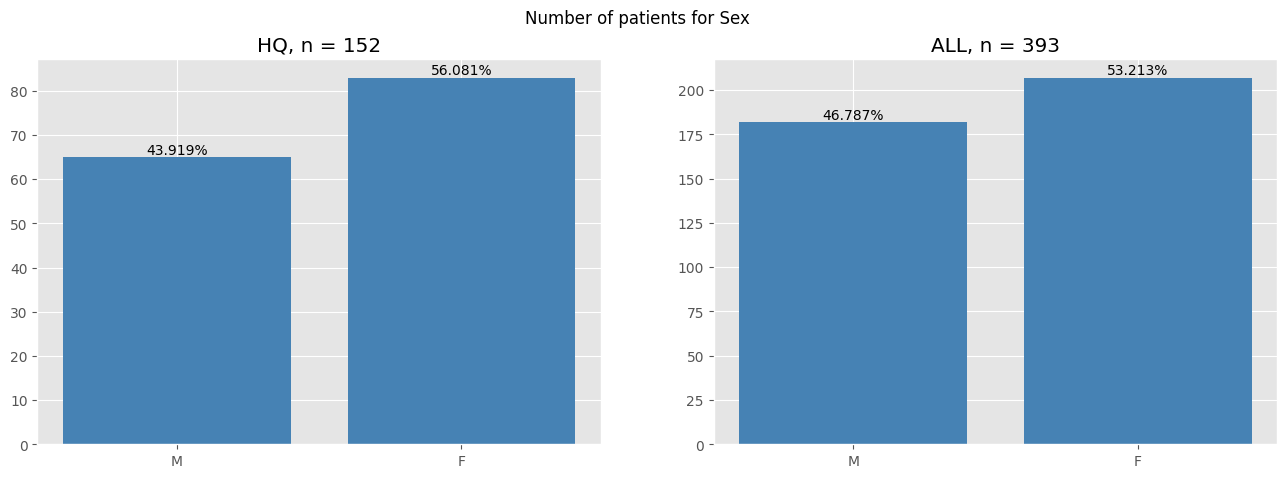

In [ ]:
## How many patients for different sex
plot_for_class(master_annotations_df, master_annotations_df_hq, "Patient_Sex", "Number of patients for Sex", "steelblue")

,Count,%
Institution,,
UC Davis,6,3.947
Memorial Sloan Kettering,7,4.605
MD Anderson,13,8.553
Cleveland Clinic,17,11.184
Columbia University,30,19.737
Dana-Farber Cancer Institute,34,22.368
Massachusetts General Hospital,45,29.605


,Count,%
Institution,,
UC Davis,8,2.036
MD Anderson,13,3.308
Cleveland Clinic,19,4.835
Yale University,22,5.598
MSKCC/Science,23,5.852
Johns Hopkins University,26,6.616
MSKCC/Cancer Cell,32,8.142
Columbia University,33,8.397
Massachusetts General Hospital,58,14.758


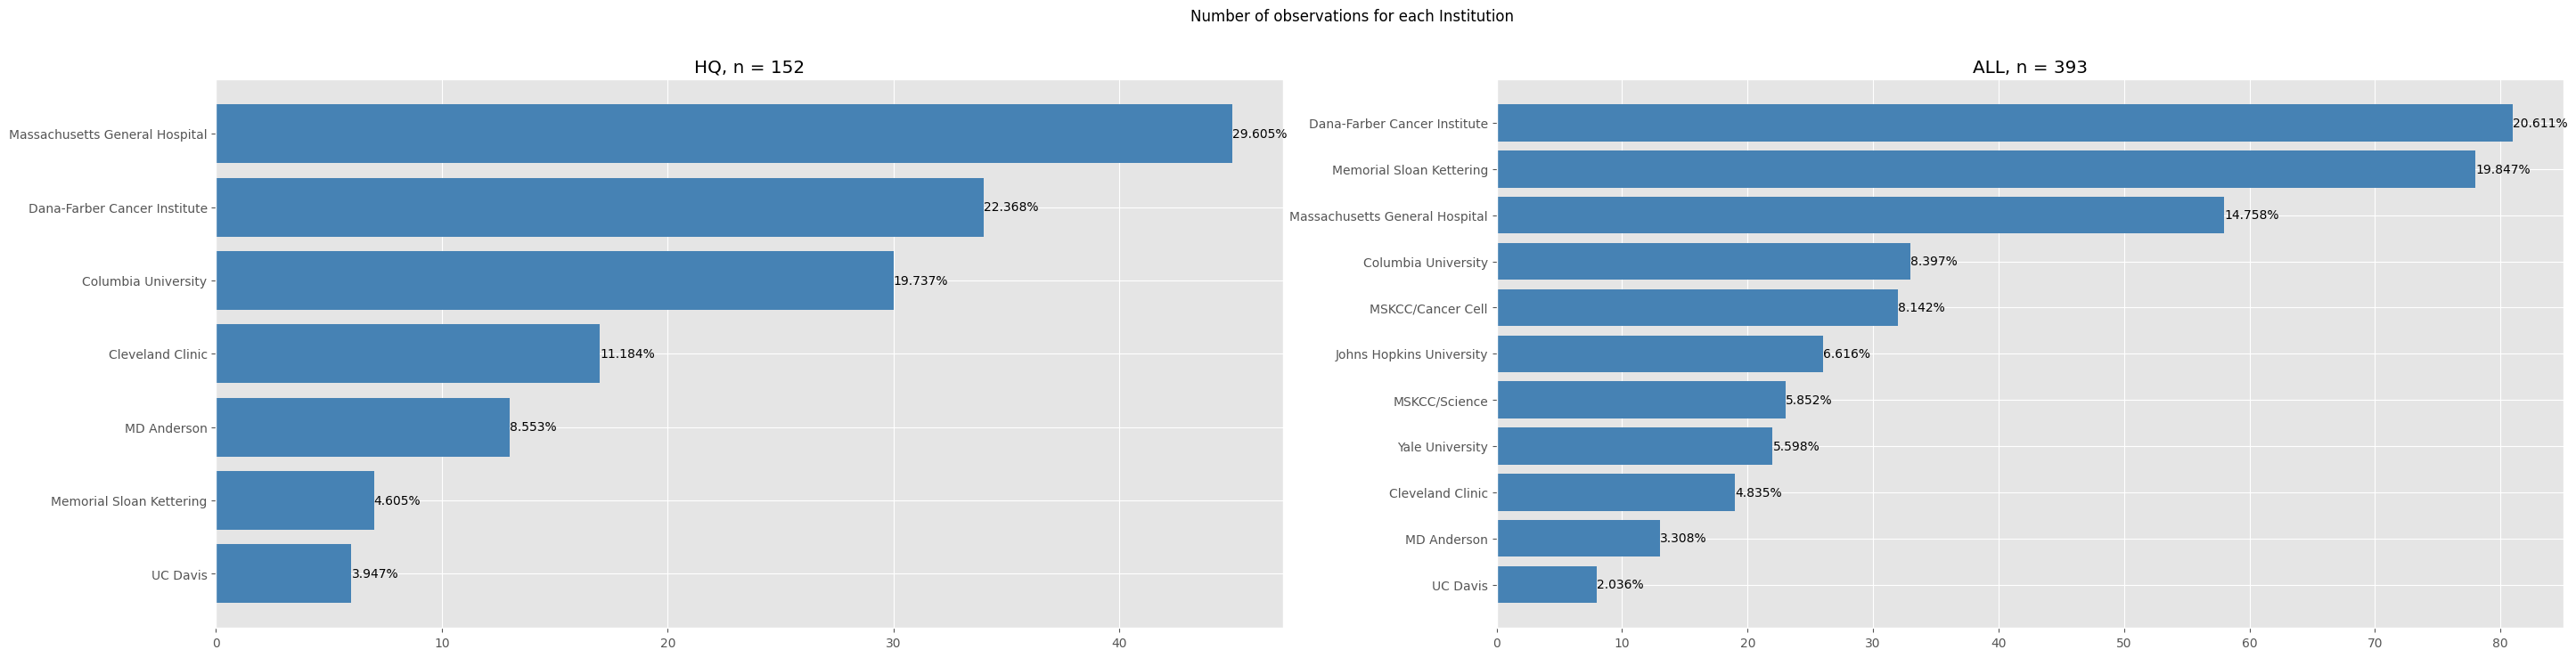

In [ ]:
## Distribution of Institution
plot_for_class(master_annotations_df, master_annotations_df_hq, "Institution", "Number of observations for each Institution", "steelblue")

,Count,%
Patient_Smoking_Status,,
2.0,21,14.189
0.0,23,15.541
1.0,104,70.270


,Count,%
Patient_Smoking_Status,,
0.0,46,11.825
2.0,60,15.424
1.0,283,72.751


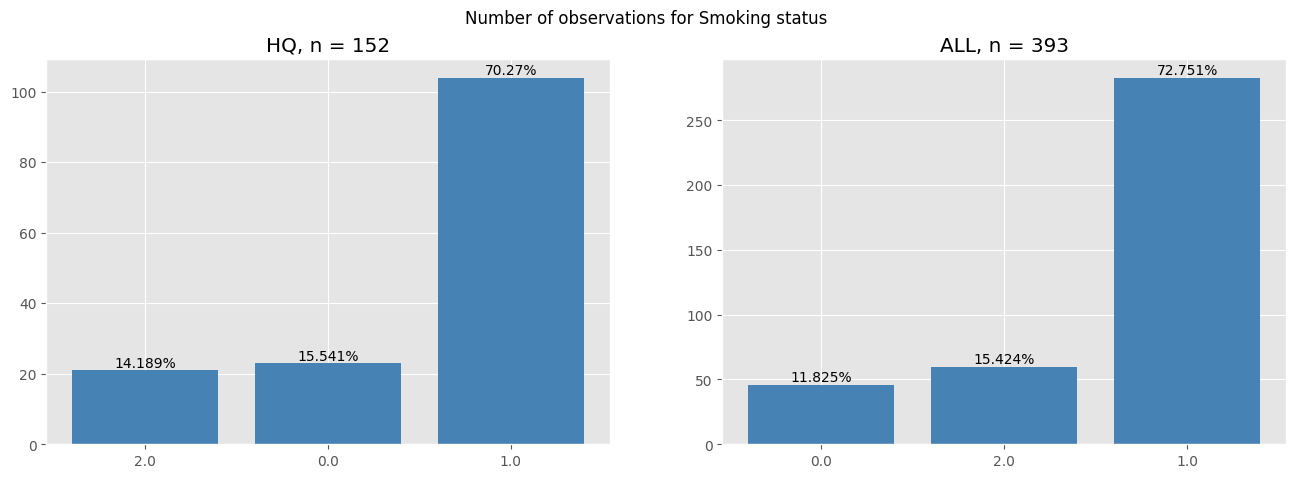

In [ ]:
## Distribution of Smoking Status
plot_for_class(master_annotations_df, master_annotations_df_hq, "Patient_Smoking_Status", "Number of observations for Smoking status", "steelblue")

,Count,%
Patient_Age_at_Diagnosis,,
40,1,0.676
83,1,0.676
81,1,0.676
88,1,0.676
50,1,0.676
>89,1,0.676
44,1,0.676
77,2,1.351
80,2,1.351


,Count,%
Patient_Age_at_Diagnosis,,
29,1,0.257
86,1,0.257
85,1,0.257
82,1,0.257
>89,1,0.257
39,1,0.257
42,1,0.257
38,1,0.257
87,2,0.514


,Count
Interval,
40-49,14
50-59,34
60-69,53
70-79,41
80-89,5


,Count
Interval,
20-29,1
30-39,2
40-49,32
50-59,90
60-69,148
70-79,95
80-89,20


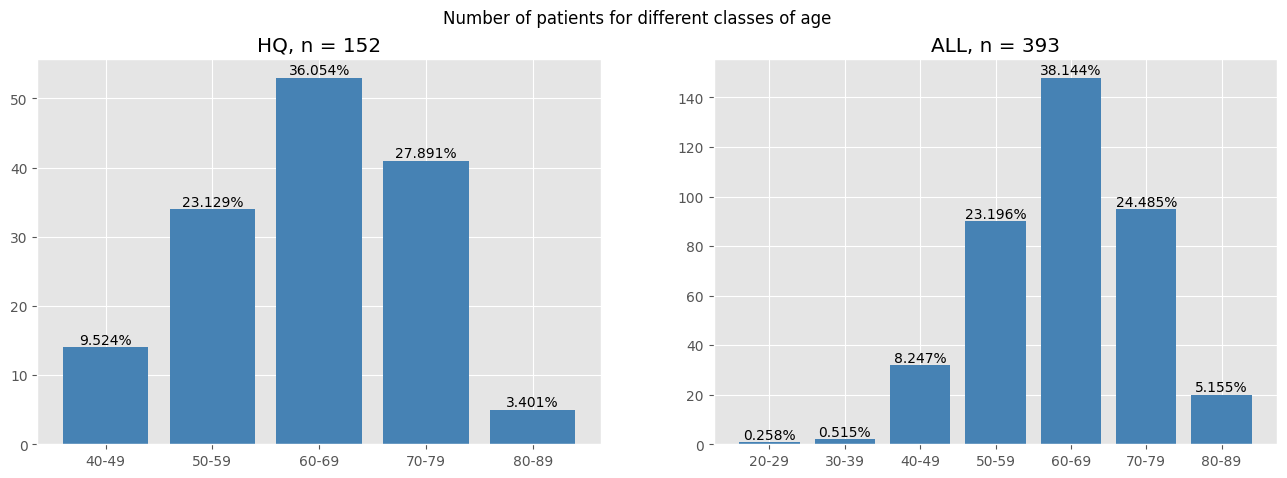

In [ ]:
## Distribution of Age
plot_for_class(master_annotations_df, master_annotations_df_hq, "Patient_Age_at_Diagnosis", "Number of patients for different classes of age", "steelblue")

,Count,%
Histology_Harmonized,,
LC-NE,2,1.351
Other,4,2.703
Squamous,32,21.622
Adeno,110,74.324


,Count,%
Histology_Harmonized,,
LC-NE,9,2.314
Other,17,4.370
Squamous,77,19.794
Adeno,286,73.522


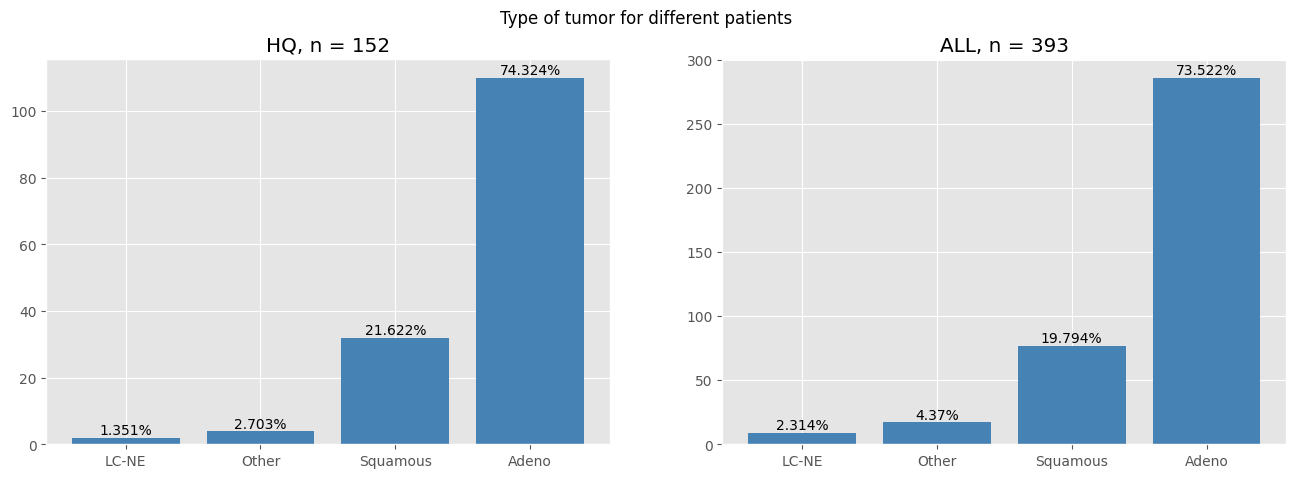

In [ ]:
## Type of tumor
plot_for_class(master_annotations_df, master_annotations_df_hq, "Histology_Harmonized", "Type of tumor for different patients", "steelblue")

,Count,%
Agent_PD1,,
Atezolizumab + Epacadostat,1,0.676
Avelumab,1,0.676
Durvalumab + Tremelimumab,1,0.676
Nivolumab + Gemcitabine,1,0.676
Nivolumab + LAG-3,1,0.676
Nivolumab + Urelumab,1,0.676
Pembrolizumab + Carboplatin + Pemetrexed,1,0.676
Nivolumab + Lirilumab,2,1.351
Atezolizumab,9,6.081


,Count,%
Agent_PD1,,
Atezolizumab + Epacadostat,1,0.257
Durvalumab + Tremelimumab,1,0.257
Nivolumab + Gemcitabine,1,0.257
Nivolumab + LAG-3,1,0.257
Nivolumab + Urelumab,1,0.257
Pembrolizumab + Carboplatin + Pemetrexed,1,0.257
Avelumab,2,0.514
Nivolumab + Lirilumab,2,0.514
Atezolizumab,15,3.856


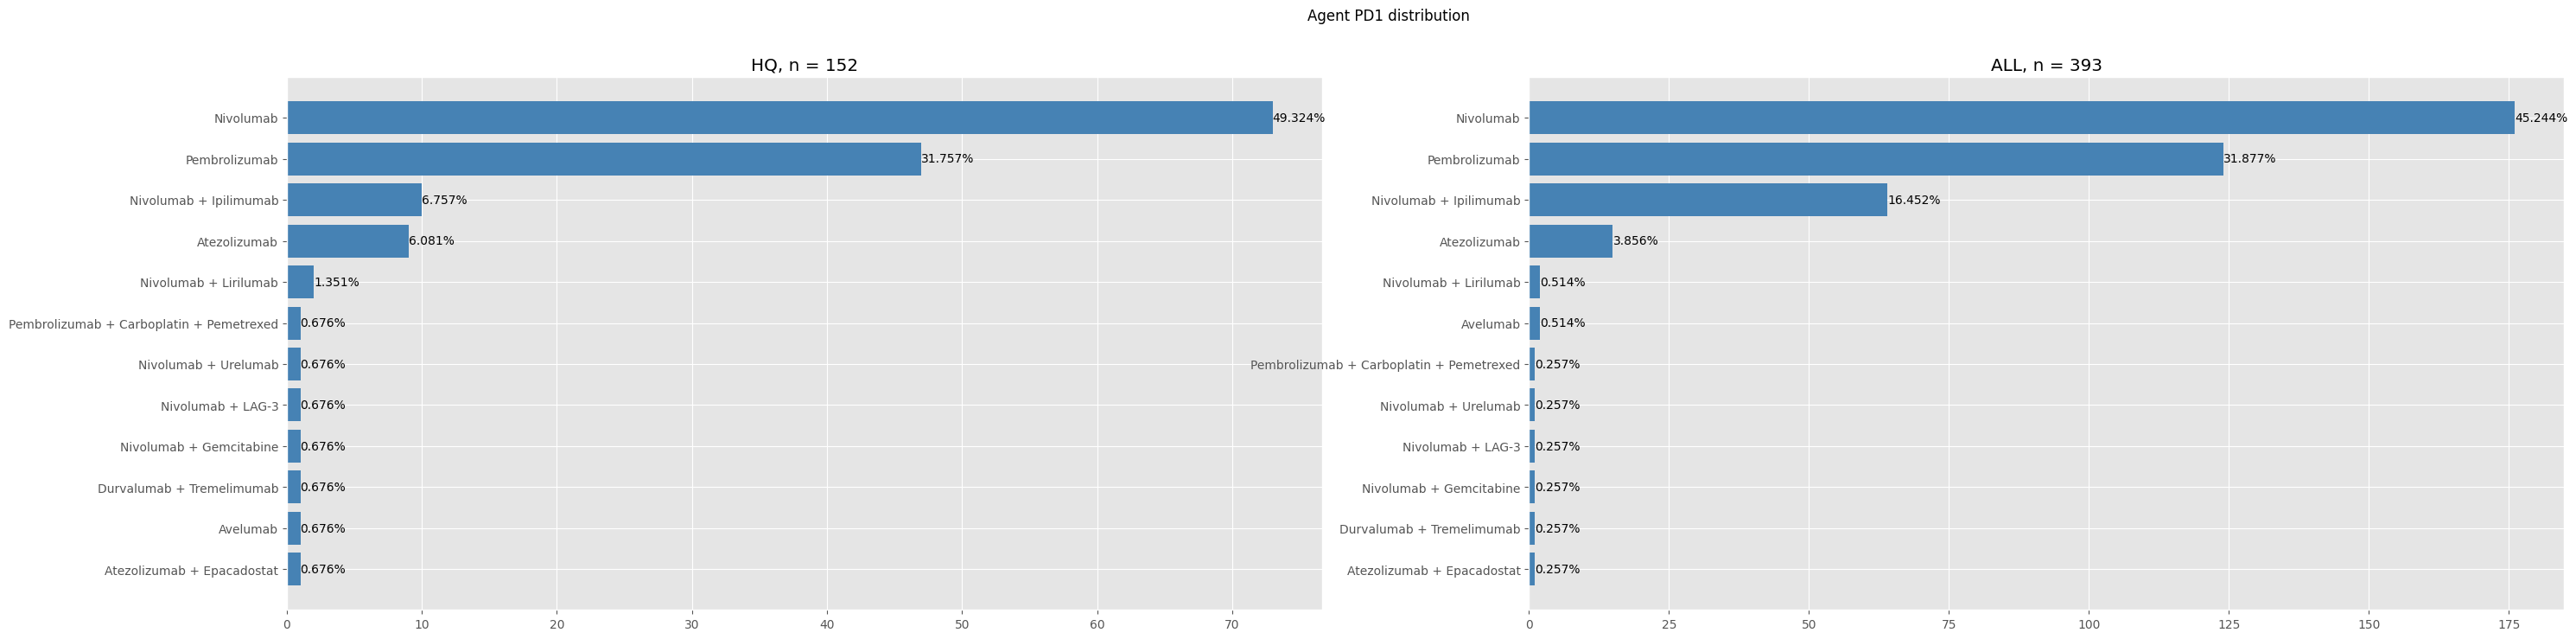

In [ ]:
## Analysis of Agent PD1
plot_for_class(master_annotations_df, master_annotations_df_hq, "Agent_PD1", "Agent PD1 distribution", "steelblue")

,Count,%
Agent_PD1_Category,,
PD(L)1 + Other,7,4.730
PD(L)1 + CTLA4,11,7.432
PD(L)1,130,87.838


,Count,%
Agent_PD1_Category,,
PD(L)1 + Other,7,1.799
PD(L)1 + CTLA4,65,16.710
PD(L)1,317,81.491


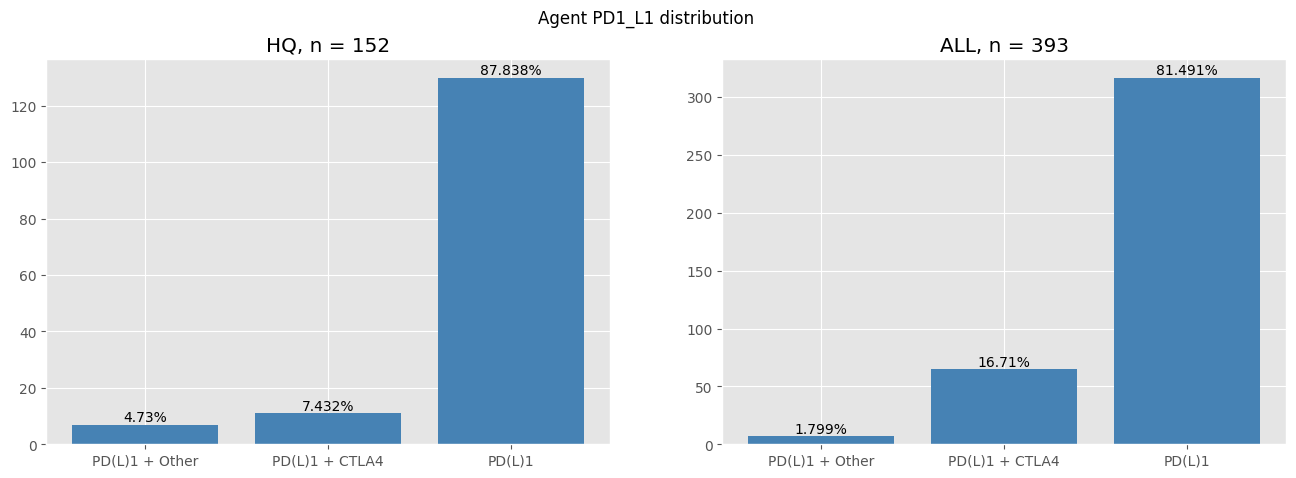

In [ ]:
## Analysis of Agent PD1_L1 for category
plot_for_class(master_annotations_df, master_annotations_df_hq, "Agent_PD1_Category", "Agent PD1_L1 distribution", "steelblue")

,Count,%
Harmonized_Confirmed_BOR,,
NE,3,2.158
CR,8,5.755
SD,39,28.058
PR,44,31.655
PD,45,32.374


,Count,%
Harmonized_Confirmed_BOR,,
NE,3,0.789
CR,19,5.000
SD,108,28.421
PR,123,32.368
PD,127,33.421


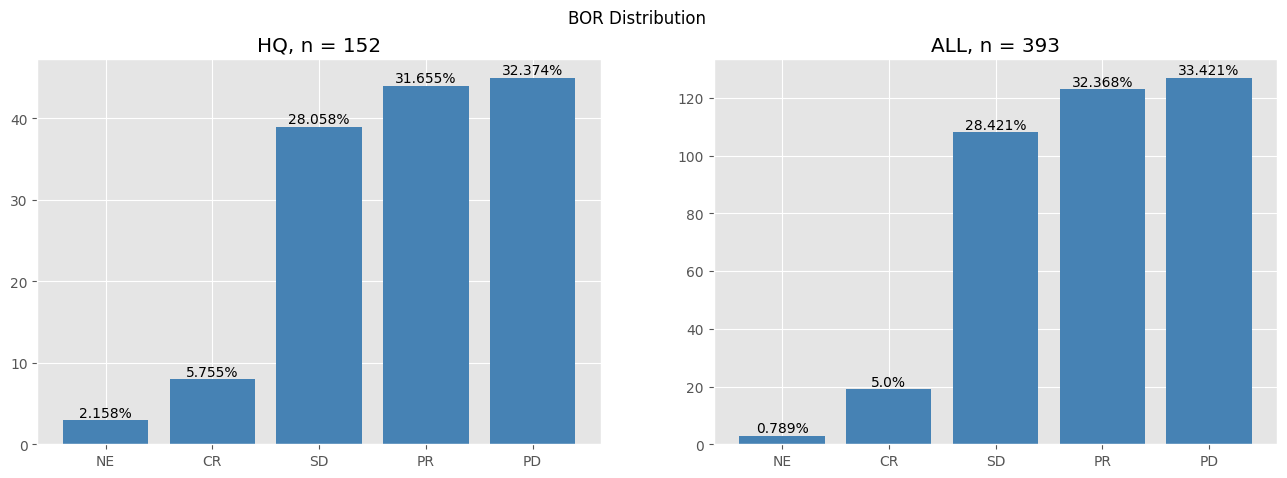

In [ ]:
## Analysis of BOR
plot_for_class(master_annotations_df, master_annotations_df_hq, "Harmonized_Confirmed_BOR", "BOR Distribution", "steelblue")

,Count,%
Harmonized_Confirmed_BOR_3_Cat,,
SD,39,28.676
PD,45,33.088
CR/PR,52,38.235


,Count,%
Harmonized_Confirmed_BOR_3_Cat,,
SD,108,28.647
PD,127,33.687
CR/PR,142,37.666


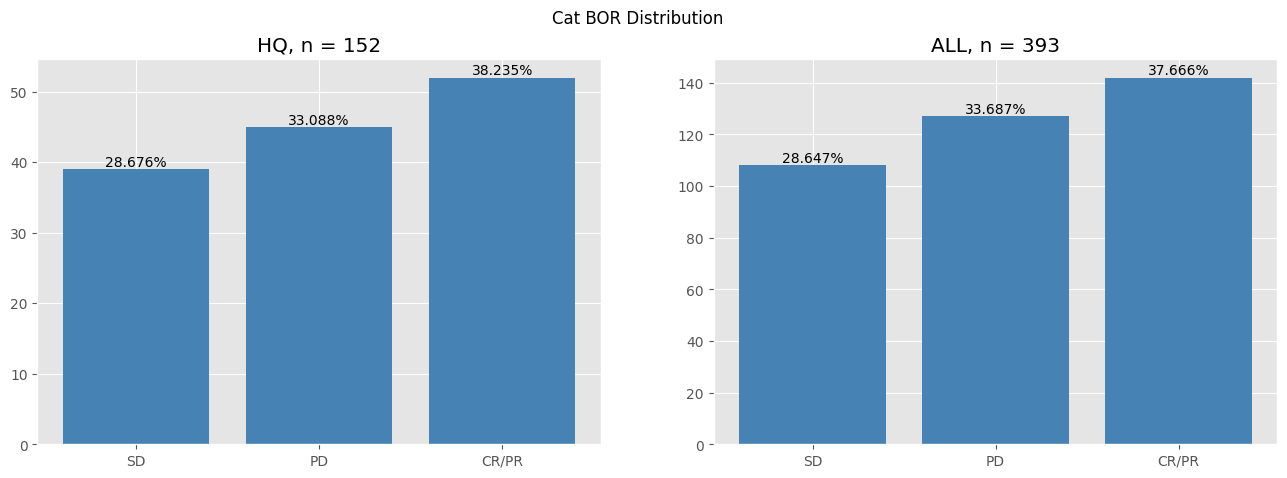

In [ ]:
## Analysis of Cut BOR
plot_for_class(master_annotations_df, master_annotations_df_hq, "Harmonized_Confirmed_BOR_3_Cat", "Cat BOR Distribution", "steelblue")